# 12.12.2024 - Wiederholung Datenkapselung, Arbeiten mit Vektoren, Matrizen und Lösen von Gleichungssystemen
---
Zu Beginn schauen wir uns ein weiteres Beispiel zum Thema Klassen in Python an. Danach betrachten wir Vektoren und Matrizen etwas genauer. Insbesondere zum Lösen von linearen Gleichungssystemen sind Matrizen eine essenzielle Datenstruktur. Eingesetzt in einem linearen Gleichugnssystem können komplexe Zusammenhänge von praktischen Problemen formuliert werden. Einmal aufgestellt, sind solche Gleichungssysteme mit Numpy schnell gelöst.

* Zur Bearbeitung der Aufgaben können Sie benötigte Informationen zu Python-Befehlen und zu KI relevanten Bibliotheken (numpy, scikit, pandas) aus allen verfügbaren Quellen beziehen. Die meisten findet man natürlich über eine Suche im Internet, oder durch die Nutzung von KI chat-Systemen selbst.
Ein gutes Tutorial für den Start findet sich  z.B. hier: https://www.python-kurs.eu/numerisches_programmieren_in_Python.php

## Phase 1: Wiederholung zu Datenkapselung in Klassen

Das Konzept der *objektorientierten Programmierung (OOP)* beinhaltet, dass man den Zugriff und die Sichtbarkeit "von Außen" auf die Klassenattribute beschränken kann. Die zugehörigen Stufen der "Privatsphäre" sind:

| **Deutsch**                     | **offizieller Begriff (Englisch))**           | **Bedeutung**                                           |
|---------------------------------|-----------------------------------------------|---------------------------------------------------------|
| Öffentlich                      | Public Attribute                              | Frei zugänglich, keine Namenspräfixe.                   |
| Geschützt                       | Protected Attribute                           | Mit `_` markiert, nur als Konvention vor Zugriff von Außen geschützt.         |
| Privat                          | Private Attribute                             | Mit `__` markiert, unmittelbarer Zugriff von Außen nicht möglich. |



### Nachbesprechung der Aufgabe: Anwendung obiger Sichtbarkeitseigenschaften auf die Attribute der Bauteil-Klasse

Fügen Sie der Klasse Bauteil eine Zählervariable hinzu, die zählt, wie oft das Bauteil gekürzt wurde. Mit einer @property decoration soll der Wert des Zählers abrufbar sein. Allerdings soll sein Wert nur innerhalb der Klasse verändert werden dürfen. 
Wenden Sie unterschiedliche Stufen der Sichtbarkeit (siehe Tabelle oben) auf die Attribute der Klasse an. 

In [25]:
# Klassendefinition
class Bauteil:
    def __init__(self, nummerInit, laengeInit, breiteInit):
        # Konstruktor, der Bauteilnummer, Länge und Breite des Bauteils initialisiert
        self.nummer = nummerInit            # öffentliches Attribut
        self._laenge = laengeInit           # geschütztes Attribut
        self._breite = breiteInit           # geschütztes Attribut
        self.__kuerzenZaehler = 0           # privates Attribut

    @property
    # Getter: Gibt den Wert der Länge zurück
    def laenge(self):
        return self._laenge
    
    @property
    # Getter: Gibt den Wert der Breite zurück
    def breite(self):
        return self._breite

    @property
    # Getter: Gibt den Wert des Kürzen-Zählers zurück
    def kuerzenZaehler(self):
        return self.__kuerzenZaehler


    @laenge.setter
    # Setter: Setzt den Wert der Länge
    def laenge(self, wert):
        if wert < 0:
            raise ValueError("Länge darf nicht negativ sein")
        self._laenge = wert

    @breite.setter
    # Setter: Setzt den Wert der Länge
    def breite(self, wert):
        if wert < 0:
            raise ValueError("Breite darf nicht negativ sein")
        self._breite = wert


    def berechne_flaeche(self):
        # Methode: Berechnet die Fläche des Bauteils
        return self._laenge * self._breite

    def berechne_umfang(self):
        # Methode: Berechnet den Umfang des Bauteils
        return 2 * (self._laenge + self._breite)
    
    def kuerzen(self, deltaL, deltaB):
        """
        Methode zum Verkürzen der Länge und Breite eines Bauteils.
        Die Werte deltaL und deltaB bestimmen um wie viel
        die Länge und Breite des Bauteils verkürzt werden sollen.
        """
        # Verkürze die Länge und Breite
        self._laenge -= deltaL
        self._breite -= deltaB

        # Stelle sicher, dass die Länge und Breite nicht negativ werden
        if self._laenge < 0:
            self._laenge = 0
        if self._breite < 0:
            self._breite = 0

        # Erhöhe den Kürzungszähler
        self.__kuerzenZaehler += 1


    def __str__(self):
        # Gibt eine textuelle Beschreibung des Bauteils mit Nummer, Länge, Breite, Fläche und Umfang zurück
        return "Bauteil Nr. {0} - Länge: {1} m, Breite: {2} m, Fläche: {3:.2f} m², Umfang: {4:.2f} m, Anzahl Kürzungen: {5}".format(
            self.nummer, self._laenge, self._breite, self.berechne_flaeche(), self.berechne_umfang(), self.__kuerzenZaehler
        )


# Hauptprogramm

# Liste von Bauteilen (Länge und Breite laut der Tabelle)
bauteile = [
    Bauteil(1, 2, 3),
    Bauteil(2, 0.5, 0.8),
    Bauteil(3, 0.2, 0.1),
    Bauteil(4, 2.5, 2.5),
    Bauteil(5, 1, 1.8)
]

# Ausgabe der Informationen zu jedem Bauteil
for bauteil in bauteile:
    print(bauteil)

# Kürze das letzte Bauteil der Liste
print("\nDas letzte Bauteil wird nun gekürzt")
bauteile[-1].kuerzen(0,0.8)
for bauteil in bauteile:
    print(bauteil)

print("\nDer Kürzen-Zähler des letzten Bauteils wird nun von außen gelesen:")
print(bauteile[-1].kuerzenZaehler)

# help(bauteil.kuerzen)

Bauteil Nr. 1 - Länge: 2 m, Breite: 3 m, Fläche: 6.00 m², Umfang: 10.00 m, Anzahl Kürzungen: 0
Bauteil Nr. 2 - Länge: 0.5 m, Breite: 0.8 m, Fläche: 0.40 m², Umfang: 2.60 m, Anzahl Kürzungen: 0
Bauteil Nr. 3 - Länge: 0.2 m, Breite: 0.1 m, Fläche: 0.02 m², Umfang: 0.60 m, Anzahl Kürzungen: 0
Bauteil Nr. 4 - Länge: 2.5 m, Breite: 2.5 m, Fläche: 6.25 m², Umfang: 10.00 m, Anzahl Kürzungen: 0
Bauteil Nr. 5 - Länge: 1 m, Breite: 1.8 m, Fläche: 1.80 m², Umfang: 5.60 m, Anzahl Kürzungen: 0

Das letzte Bauteil wird nun gekürzt
Bauteil Nr. 1 - Länge: 2 m, Breite: 3 m, Fläche: 6.00 m², Umfang: 10.00 m, Anzahl Kürzungen: 0
Bauteil Nr. 2 - Länge: 0.5 m, Breite: 0.8 m, Fläche: 0.40 m², Umfang: 2.60 m, Anzahl Kürzungen: 0
Bauteil Nr. 3 - Länge: 0.2 m, Breite: 0.1 m, Fläche: 0.02 m², Umfang: 0.60 m, Anzahl Kürzungen: 0
Bauteil Nr. 4 - Länge: 2.5 m, Breite: 2.5 m, Fläche: 6.25 m², Umfang: 10.00 m, Anzahl Kürzungen: 0
Bauteil Nr. 5 - Länge: 1 m, Breite: 1.0 m, Fläche: 1.00 m², Umfang: 4.00 m, Anzahl Kürz

### Aufgabe 1: Modellierung eines einfachen Temperaturüberwachungssystems für Produktionsmaschinen

Erstellen Sie eine Maschine-Klasse, die ihre eigene Betriebstemperatur überwacht.
Die Maschine soll neben ihrer *aktuellen* Beriebstemperatur auch einen Temperaturwert haben, der die *maximal erlaubte* Betriebstemperatur darstellt. Bestimmen Sie selbst, welche Attribute wie stark vor Zugriff von Außen geschützt sind, und welche getter- und setter-Methoden Sie einführen wollen. 

Zudem gibt es zwei Methoden, die die möglichen Betriebsschritte der Maschine darstellen:
- *produzieren*: Erhöht die interne Betriebstemperatur um 10%. Sie gibt bspw. "Produktion erfolgreich" aus, wenn die Betriebstemperatur <= der maximal erlaubten Temperatur ist, ansonsten "Betriebstemperatur zu hoch".
- *stillstehen*: Verringert die interne Betriebstemperatur um 10%.

Erstellen Sie im Hauptprogramm Objekte dieser Klasse, mit unterschiedlichen Werten für die initiale Temperatur und die maximal zulässige Temperatur. Simulieren Sie, wie viele erfolgreiche produzieren-Schritte nacheinander ausgeführt werden können.  

In [1]:
class Maschine:
    def __init__(self, initiale_temperatur, max_temperatur):
        self._betriebstemperatur = initiale_temperatur  # Aktuelle Temperatur (geschützt)
        self.__max_temperatur = max_temperatur  # Maximal erlaubte Temperatur (privat)

    @property
    def betriebstemperatur(self):
        return self._betriebstemperatur
    
    def produzieren(self):
        # Erhöht die Temperatur um 10%
        self._betriebstemperatur *= 1.1
        if self._betriebstemperatur <= self.__max_temperatur:
            print("Produktion erfolgreich")
            return True
        else:
            print("Betriebstemperatur zu hoch")
            self.stillstehen()
            return False

    def stillstehen(self):
        # Verringert die Temperatur um 10%
        self._betriebstemperatur *= 0.9
        print(f"Maschine abgekühlt. Aktuelle Temperatur: {self._betriebstemperatur:.2f}")


# Hauptprogramm
if __name__ == "__main__":
    # Objekte der Maschine-Klasse erstellen
    maschine1 = Maschine(initiale_temperatur=50, max_temperatur=100)
    maschine2 = Maschine(initiale_temperatur=70, max_temperatur=150)

    # Simulation: Wie viele produzieren-Schritte sind nacheinander möglich?
    for maschine in [maschine1, maschine2]:
        print("\n--- Simulation für eine Maschine ---")
        schritte = 0
        while maschine.produzieren():
            schritte += 1
        print(f"Die Maschine konnte {schritte} Produktionsschritte nacheinander durchführen.")

    # Stillstand-Phase simulieren
    print("\nMaschine 1 kühlt ab...")
    maschine1.stillstehen()
    print("Maschine 2 kühlt ab...")
    maschine2.stillstehen()

    m3 = Maschine(50, 1000)
    for i in range(20):
        print("Tempartur m3: {0}".format(m3.betriebstemperatur))
        if (i % 2 == 0):
            m3.produzieren()
        else:
            m3.stillstehen()




--- Simulation für eine Maschine ---
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Betriebstemperatur zu hoch
Maschine abgekühlt. Aktuelle Temperatur: 96.46
Die Maschine konnte 7 Produktionsschritte nacheinander durchführen.

--- Simulation für eine Maschine ---
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Produktion erfolgreich
Betriebstemperatur zu hoch
Maschine abgekühlt. Aktuelle Temperatur: 135.05
Die Maschine konnte 7 Produktionsschritte nacheinander durchführen.

Maschine 1 kühlt ab...
Maschine abgekühlt. Aktuelle Temperatur: 86.82
Maschine 2 kühlt ab...
Maschine abgekühlt. Aktuelle Temperatur: 121.54
Tempartur m3: 50
Produktion erfolgreich
Tempartur m3: 55.00000000000001
Maschine abgekühlt. Aktuelle Temperatur: 49.50
Tempartur m3: 49.50000000000001
Produktion erfolgreich
T

## Phase 2: Matrizen und Lineare Gleichungssysteme

Vektoren und Matrizen sind grundlegende Datenstrukturen für mathematische Berechnungen. In Pythons NumPy können arrays genutzt werden, um mit Vektoren und Matrizen zu arbeiten und sie für schnelle Berechnungen und Datenmanipulationen zu nutzen. Die Anwendungen beinhalten z.B. Maschinelles Lernen (zur Verarbeitung großer Datensätze oder neuronaler Netzwerke), Bild- und Signalverarbeitung (für Pixel-Operationen), Simulationen (wie physikalische oder finanzmathematische Modelle), Optimierungen und numerische Berechnungen,...

Ein *Vektor* ist eine eindimensionale Datenstruktur, die eine geordnete Liste von Zahlen darstellt. In Python wird dies häufig als 1D-Array implementiert.
Eine *Matrix* ist eine zweidimensionale Datenstruktur, die Zahlen in einem rechteckigen Gitter anordnet. In Python wird dies als 2D-Array oder Numpy-Matrix dargestellt.

### 2. Aufgabe: Erstellen und Rechnen mit Vektoren

1. Erstellen Sie zwei Vektoren $u$ und $v$, jeder bestehend aus 2 Komponenten. Berechnen Sie die Summe $z=u+v$.  
2. Visualisieren Sie die Vektoren $u$, $v$ und $z$. Matplotlib bietet dazu Möglichkeiten, die Vektoren als Pfeile darzustellen.  

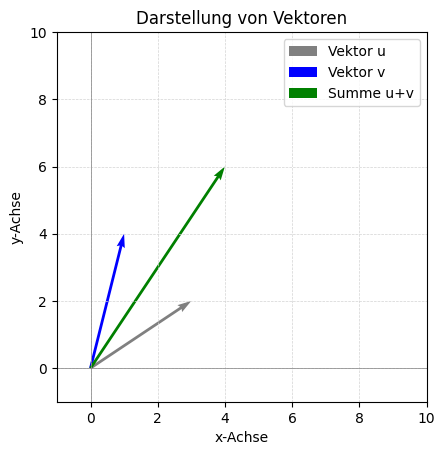

Skalarprodukt = 11


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Vektoren
vector_u = np.array([3, 2])
vector_v = np.array([1, 4])
vector_z = vector_u + vector_v

# Ursprung der Vektoren
origin = np.array([0, 0])

# Erstellen der Grafik
# plt.figure(figsize=(6, 6))
plt.quiver(*origin, *vector_u, angles='xy', scale_units='xy', scale=1, color='gray', label='Vektor u')
plt.quiver(*origin, *vector_v, angles='xy', scale_units='xy', scale=1, color='b', label='Vektor v')
plt.quiver(*origin, *vector_z, angles='xy', scale_units='xy', scale=1, color='g', label='Summe u+v')

# Achsen anpassen
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Beschriftung
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Darstellung von Vektoren')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.gca().set_aspect('equal', adjustable='box')

# Grafik anzeigen
plt.show()


# Berechnungen

print("Skalarprodukt = {0}".format(np.dot(vector_u,vector_v)))

### Das Skalarprodukt und sein Zusammenhang mit dem Winkel zwischen Vektoren

Das **Skalarprodukt** zweier Vektoren $\mathbf{a} = (a_1, a_2, \dots, a_n)$ und $\mathbf{b} = (b_1, b_2, \dots, b_n)$ wird folgendermaßen berechnet:

$$
\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + \dots + a_n \cdot b_n
$$

Das Ergebnis ist eine Zahl (ein Skalar).

#### Beispiel

$$
\begin{pmatrix} 
3 & 2 & 1
\end{pmatrix}

\cdot

\begin{pmatrix} 
1  \\
0  \\
4 
\end{pmatrix}

=

3 \cdot 1 + 2 \cdot 0 + 1 \cdot 4 

=

7
$$

Das Skalarprodukt (auch inneres Produkt oder Punkt-Produkt genannt) zweier Vektoren $ \mathbf{a} $ und $ \mathbf{b} $ ist eng mit dem Winkel $ \theta $ zwischen diesen Vektoren verknüpft. Der mathematische Zusammenhang lautet:

$$
\mathbf{a} \cdot \mathbf{b} = |\mathbf{a}| |\mathbf{b}| \cos(\theta)
$$

- $ \mathbf{a} \cdot \mathbf{b} $: Das Skalarprodukt der Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.
- $ |\mathbf{a}| $ und $ |\mathbf{b}| $: Die Längen (Beträge) der Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.
- $ \theta $: Der Winkel zwischen den Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.

#### Wichtige Schlussfolgerungen:
1. **Positives Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} > 0 $): Der Winkel $ \theta $ liegt zwischen 0° und 90° (Vektoren zeigen in ähnliche Richtungen).
2. **Null Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} = 0 $): Der Winkel $ \theta $ beträgt 90° (die Vektoren sind orthogonal, also senkrecht zueinander).
3. **Negatives Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} < 0 $): Der Winkel $ \theta $ liegt zwischen 90° und 180° (Vektoren zeigen in entgegengesetzte Richtungen).

Das Skalarprodukt kann somit verwendet werden, um den Winkel zwischen zwei Vektoren zu berechnen und die Beziehung zwischen ihnen zu verstehen.



### 3. Aufgabe

Berechnen Sie das Skalarprodukt ihrer Vektoren $u$ und $v$ aus Aufgabe 2. Ändern Sie (einen) der Vektoren und beobachten Sie, wie das Skalarprodukt den Winkel zwischen den Vektoren beschreibt.

In [7]:
import numpy as np

u = np.array([3, 2])
v = np.array([1, 4])

print (f"Das Skalarprodukt zwischen {u} und {v} ist {np.dot(u,v)}.")

for i in range(10):
    u = u + np.array([0, 1])
    print (f"Das Skalarprodukt zwischen {u} und {v} ist {np.dot(u,v)}.")



Das Skalarprodukt zwischen [3 2] und [1 4] ist 11.
Das Skalarprodukt zwischen [3 3] und [1 4] ist 15.
Das Skalarprodukt zwischen [3 4] und [1 4] ist 19.
Das Skalarprodukt zwischen [3 5] und [1 4] ist 23.
Das Skalarprodukt zwischen [3 6] und [1 4] ist 27.
Das Skalarprodukt zwischen [3 7] und [1 4] ist 31.
Das Skalarprodukt zwischen [3 8] und [1 4] ist 35.
Das Skalarprodukt zwischen [3 9] und [1 4] ist 39.
Das Skalarprodukt zwischen [ 3 10] und [1 4] ist 43.
Das Skalarprodukt zwischen [ 3 11] und [1 4] ist 47.
Das Skalarprodukt zwischen [ 3 12] und [1 4] ist 51.


### Matrix-Vektor-Multiplikation

Bei der **Matrix-Vektor-Multiplikation** wird eine Matrix $A$ der Größe $m \times n$ mit einem Vektor $\mathbf{x}$ der Länge $n$ multipliziert. Das Ergebnis ist ein Vektor $\mathbf{b}$ der Länge $m$.

$$
A \cdot \mathbf{x} =
\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{pmatrix}
$$

Jedes Element $b_i$ wird berechnet als:

$$
b_i = a_{i1} \cdot x_1 + a_{i2} \cdot x_2 + \dots + a_{in} \cdot x_n
$$

Die Matrix-Vektor-Multiplikation ist definiert, wenn die Anzahl der Spalten der Matrix gleich der Anzahl der Komponenten im Vektor ist.

Die allgemeine Formel für die Matrix-Vektor Multiplikation sieht wie folgt aus:

$$
b_i = \sum_{k=1}^{n} a_{ik} \cdot x_k, \quad  \text{für } i = 1,\ldots,m.
$$

#### Beispiel

$$
\begin{pmatrix} 
3 & 2 & 1 \\
1 & 0 & 2
\end{pmatrix}

\cdot

\begin{pmatrix} 
1  \\
0  \\
4 
\end{pmatrix}

=

\begin{pmatrix} 
3 \cdot 1 + 2 \cdot 0 + 1 \cdot 4 \\
*  
\end{pmatrix}

=

\begin{pmatrix} 
7 \\
*  
\end{pmatrix}

=

\begin{pmatrix} 
7  \\
9 
\end{pmatrix}
$$




### 4. Aufgabe: Rechnen mit Matrizen und Vektoren

Ein Unternehmen plant, die Produktion und den Vertrieb seiner Produkte in drei Regionen zu analysieren. Die Produkte sind *A*, *B* und *C*. Die folgende Matrix gibt an, wie viele Einheiten der Produkte in den Regionen *Nord*, *Süd*, *West* und *Ost* verkauft wurden:

$$
\text{Verkaufszahlen} = 
\begin{pmatrix}
10 & 20 & 15 \\
5 & 8 & 12 \\
7 & 14 & 10 \\
4 & 0 & 14
\end{pmatrix}
$$
 wobei
- jede Zeile einer Region entspricht, und
- jede Spalte einem Produkt entspricht.

Die Produktionskosten pro Einheit der Produkte (in Euro) sind:

$$
\text{Kosten pro Einheit} = 
\begin{pmatrix}
50 \\
30 \\
40
\end{pmatrix}
$$

Jede Zeile des Vektors entspricht dabei einem Produkt.

Berechnen Sie die Gesamtkosten für jede Region, indem Sie die Verkaufszahlen-Matrix mit dem Kostenvektor multiplizieren.
Geben Sie die Gesamtkosten als Vektor aus.



In [16]:
import numpy as np

# Verkaufszahlen-Matrix als array
verkaufszahlen = np.array([
    [10, 20, 15],
    [5, 8, 12],
    [7, 14, 10],
    [4, 0, 14]
])

# Kosten pro Einheit (Kostenvektor)
kosten_pro_einheit = np.array([50, 30, 40])

# Gesamtkosten für jede Region berechnen
gesamtkosten = np.dot(verkaufszahlen, kosten_pro_einheit)

# Ausgabe des Ergebnisses
print("Gesamtkosten pro Region:", gesamtkosten)


Gesamtkosten pro Region: [1700  970 1170  760]


### Matrixmultiplikation


Bei der **Matrix-Matrix-Multiplikation** wird eine Matrix $A$ der Größe $m \times n$ mit einer Matrix $B$ der Größe $n \times p$ multipliziert. Das Ergebnis ist eine neue Matrix $C$ der Größe $m \times p$.

$$
A \cdot B =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{11} & b_{12} & \dots & b_{1p} \\
b_{21} & b_{22} & \dots & b_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
b_{n1} & b_{n2} & \dots & b_{np}
\end{bmatrix}
=
\begin{bmatrix}
c_{11} & c_{12} & \dots & c_{1p} \\
c_{21} & c_{22} & \dots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
c_{m1} & c_{m2} & \dots & c_{mp}
\end{bmatrix}
$$

Jedes Element $c_{ij}$ der Ergebnis-Matrix $C$ wird berechnet als:

$$
c_{ij} = a_{i1} \cdot b_{1j} + a_{i2} \cdot b_{2j} + \dots + a_{in} \cdot b_{nj}
$$

**Leitsatz:** *"Zeile mal Spalte."* (wie bei der Matrix-Vektor Multiplikation)

Die allgemeine Formel zur Berechnung der Elemente der Matrix $C$ sieht wie folgt aus:

$$
c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$$

- $c_{ij}$: Das Element in der $i$-ten Zeile und $j$-ten Spalte von $C$.
- $a_{ik}$: Das Element in der $i$-ten Zeile und $k$-ten Spalte von $A$.
- $b_{kj}$: Das Element in der $k$-ten Zeile und $j$-ten Spalte von $B$.


#### Beispiel

$$
\begin{pmatrix} 
3 & 2 & 1 \\
1 & 0 & 2
\end{pmatrix}

\cdot

\begin{pmatrix} 
1 & 2 \\
0 & 1 \\
4 & 0
\end{pmatrix}

=

\begin{pmatrix} 
7 & \quad 3 \cdot 2 + 2 \cdot 1 + 1 \cdot 0  \\
* & * 
\end{pmatrix}

=

\begin{pmatrix} 
7 & 8 \\
* & * 
\end{pmatrix}

=

\begin{pmatrix} 
7 & 8 \\
9 & 2
\end{pmatrix}
$$

### 5. Aufgabe: Multiplikation von Matrizen

Das Unternehmen aus der Aufgabe zuvor hat Daten gesammelt zu den Kosten der vergangenen 6 Monate. Die folgende Matrix gibt an, wie hoch die Kosten für jedes Produkt in jedem der vergangenen 6 Monate waren:


$$
\text{Kosten pro Einheit pro Monat} = 
\begin{pmatrix}
50 & 52 & 48 & 51 & 49 & 53 \\
30 & 32 & 29 & 31 & 28 & 30 \\
40 & 41 & 39 & 42 & 38 & 40
\end{pmatrix}
$$


Jede Zeile entspricht einem Produkt, und jede Spalte repräsentiert einen Monat.

Berechnen Sie die Gesamtkosten für jede Region für jeden der 6 Monate.
Geben Sie die Gesamtkosten als Matrix aus.



In [8]:
import numpy as np

# Verkaufszahlen-Matrix (Regionen x Produkte) als array
verkaufszahlen = np.array([
    [10, 20, 15],
    [5, 8, 12],
    [7, 14, 10],
    [4, 0, 14]
])

# Kosten pro Einheit pro Monat (Produkte x Monate) als array
kosten_pro_einheit_pro_monat = np.array([
    [50, 52, 48, 51, 49, 53],
    [30, 32, 29, 31, 28, 30],
    [40, 41, 39, 42, 38, 40]
])

# Gesamtkosten-Matrix berechnen (Regionen x Monate)
gesamtkosten = np.dot(verkaufszahlen, kosten_pro_einheit_pro_monat)

# Ausgabe der Gesamtkosten
print("Gesamtkosten pro Region und Monat:")
print(gesamtkosten)


Gesamtkosten pro Region und Monat:
[[1700 1775 1645 1760 1620 1730]
 [ 970 1008  940 1007  925  985]
 [1170 1222 1132 1211 1115 1191]
 [ 760  782  738  792  728  772]]


## Einführung in Lineare Gleichungssysteme

Lineare Gleichungssysteme treten in vielen Bereichen der Mathematik, Wirtschaft und Technik auf, wenn es darum geht, mehrere unbekannte Größen unter verschiedenen Bedingungen zu berechnen.
Ein lineares Gleichungssystem besteht aus mehreren linearen Gleichungen, die gleichzeitig erfüllt werden müssen. Jede einzelne dieser Gleichungen hat die Form:

$$
a_1 x_1 + a_2 x_2 + \dots + a_n x_n = b
$$

Dabei sind $x_1, x_2, \dots, x_n$ die *Variablen* und $a_1, a_2, \dots, a_n$ sowie $b$ sind *gegebene Konstanten*.

Wir nutzen Matrizen und Vektoren, um alle Anforerungen mit ihren Variablen und Konstanten in einem Gesamtsystem darzustellen:

Wir fassen das System von linearen Gleichungen effizient in einer **Matrixform** zusammen. Jede Gleichung wird als eine Zeile der Matrix betrachtet, wobei die Koeffizienten der Variablen in den Spalten erscheinen. Ein Beispiel für ein System mit 3 Variablen und 3 Gleichungen:

1. $a_1 x_1 + a_2 x_2 + a_3 x_3 = b_1$
2. $a_4 x_1 + a_5 x_2 + a_6 x_3 = b_2$
3. $a_7 x_1 + a_8 x_2 + a_9 x_3 = b_3$

Dies kann als Matrixgleichung geschrieben werden:

$$
\begin{pmatrix}
a_1 & a_2 & a_3 \\
a_4 & a_5 & a_6 \\
a_7 & a_8 & a_9
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix}
$$

Die **Koeffizientenmatrix** (links) enthält die Koeffizienten der Variablen $x_1, x_2, x_3$, der **Lösungsvektor** (mit den Variablen) enthält die unbekannten Werte, und der **Ergebnisvektor** (rechts) enthält die Konstanten auf der rechten Seite jeder Gleichung.




### 6. Aufgabe: Budgetplanung aufstellen mit der Hilfe Linearer Gleichungssysteme

Ein Unternehmen hat ein jährliches Gesamtbudget von 1.500.000 €, das auf drei Abteilungen aufgeteilt werden muss: Marketing, Forschung & Entwicklung und Produktion. Jede Abteilung benötigt einen festen Anteil des Budgets, um ihre Aufgaben zu erfüllen. 

Die Anforderungen des Managements sind wie folgt:
- Die Forschungsabteilung benötigt 1,5-mal so viel Budget wie die Marketingabteilung.
- Die Produktionsabteilung benötigt 200.000 € mehr als die Forschungsabteilung.
- Das Gesamtbudget beträgt 1.500.000 €.

Stelle ein lineares Gleichungssystem auf, das die Budgeanforderungen widerspiegelt. Löse das lineare Gleichungssystem mit Hilfe von Numpy, um festzustellen, wie viel Budget jede Abteilung erhält.


In [9]:
import numpy as np

# Definieren der Koeffizientenmatrix (A) und der rechten Seite (B)
# Die Gleichungen basieren auf:
# x1 + x2 + x3 = 1.500.000 (Gesamtbudget)
# x2 = 1.5 * x1 (Forschung braucht 1,5-mal so viel wie Marketing)
# x3 = x2 + 200.000 (Produktion braucht 200.000 € mehr als Forschung)

A = np.array([
    [1, 1, 1],          # x1 + x2 + x3 = 1.500.000
    [-1.5, 1, 0],       # -1.5*x1 + x2 = 0 (x2 = 1.5 * x1)
    [0, -1, 1]          # -x2 + x3 = 200.000 (x3 = x2 + 200.000)
])

B = np.array([1_500_000, 0, 200_000])

# Lösen des linearen Gleichungssystems
budget = np.linalg.solve(A, B)

# Ausgabe der Ergebnisse
print(f"Marketingabteilung erhält: {budget[0]:,.2f} €")
print(f"Forschungsabteilung erhält: {budget[1]:,.2f} €")
print(f"Produktionsabteilung erhält: {budget[2]:,.2f} €")


Marketingabteilung erhält: 325,000.00 €
Forschungsabteilung erhält: 487,500.00 €
Produktionsabteilung erhält: 687,500.00 €
